<a href="https://colab.research.google.com/github/donna6355/study_python/blob/master/ml_doc2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('./data/eng_crawling.csv')
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,Completely frustrating experience. Paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,"Some good features, but this app isn't very sm...",8
2,"January 18, 2020",MrDurma,4,"This app works perfectly, it allowed us to dow...",2
3,"January 26, 2020",K Kostas,3,Good but not great for an app by LG. Not the m...,1
4,"January 17, 2020",Greg Evans,3,App is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,Wonderful,0
7146,"January 12, 2020",luis arias,5,Wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,Awesome 🌟 🌟 🌟 🌟,0
7148,"October 13, 2017",A Google user,5,Good Good Good,0


In [6]:
import re
eng = re.compile("[^a-zA-Z]")

#전처리 이모티콘, 특수문자 등 제거, 소문자 치환
#통상적으로 숫자도 지운다
df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: re.sub(eng, " ",x))
df['Review'] = df['Review'].apply(lambda x: x.strip())
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1
...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,wonderful,0
7146,"January 12, 2020",luis arias,5,wonderful,0
7147,"September 24, 2017",Tobiloba Bakare,5,awesome,0
7148,"October 13, 2017",A Google user,5,good good good,0


In [7]:
#성의 없는 30단어 미만 리뷰 제거

df['length'] = df['Review'].apply(lambda x: len(x))
df

,Date,Name,Score,Review,like,length
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,378
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,498
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,479
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,354
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,465
...,...,...,...,...,...,...
7145,"December 31, 2019",Mr Darryl Maurice Friend,5,wonderful,0,9
7146,"January 12, 2020",luis arias,5,wonderful,0,9
7147,"September 24, 2017",Tobiloba Bakare,5,awesome,0,7
7148,"October 13, 2017",A Google user,5,good good good,0,14


In [9]:
df = df.loc[df['length']>=30]
df.reset_index(drop = True)
del df['length']
df

,Date,Name,Score,Review,like
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1
...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0


In [11]:
#TOKENIZING
from nltk import word_tokenize
import nltk
nltk.download('punkt_tab')

df['token'] = df['Review'].apply(lambda x : word_tokenize(x))
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-899780402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df['Review'].apply(lambda x : word_tokenize(x))


,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[completely, frustrating, experience, paid, ex..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[some, good, features, but, this, app, isn, t,..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[this, app, works, perfectly, it, allowed, us,..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, but, not, great, for, an, app, by, lg, ..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, is, useful, but, limited, and, requires,..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[it, is, very, good, and, useful, app, in, my,..."
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[can, t, even, open, the, app, crashes]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[it, is, well, helpfull, for, my, reference, t..."
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[it, s, not, installing, showing, a, error]"


In [37]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [38]:
token = []
for i in df['token']:
    tok = []
    for w in i:
        if w in stop_words:
            pass
        else:
            tok.append(w)
    token.append(tok)
df['token'] = token
df

/tmp/ipython-input-467019179.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = token


,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[completely, frustrating, experience, paid, ex..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, features, app, smart, would, think, con..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, works, perfectly, allowed, us, download,..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interface, friend..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, useful, limited, requires, updates, wifi..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, useful, app, lifr]"
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crashes]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpfull, reference, application, good,..."
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[installing, showing, error]"


In [39]:
#어근 추출
#목적에 따라서 적절한 방법 선택 필요
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
lemmatizer =WordNetLemmatizer()
stemmer = PorterStemmer()
print([lemmatizer.lemmatize(word) for word in df['token'][0]]) #품사 유지
print(" ")
print([stemmer.stem(word) for word in df['token'][0]]) #어근, 어원

#춤을 추다
# lemmatize => 춤, 추다
# stem => 추

[nltk_data] Downloading package wordnet to /root/nltk_data...


['completely', 'frustrating', 'experience', 'paid', 'extra', 'money', 'get', 'air', 'conditioner', 'connectivity', 'work', 'time', 'try', 'use', 'get', 'connect', 'device', 'take', 'less', 'minute', 'get', 'disconnected', 'tried', 'reinstalling', 'app', 'cleared', 'cache', 'reset', 'router', 'replaced', 'router', 'nothing', 'work', 'completely', 'frustrated']
 
['complet', 'frustrat', 'experi', 'paid', 'extra', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'less', 'minut', 'get', 'disconnect', 'tri', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'complet', 'frustrat']


In [40]:
df['token'] = df['token'].apply(lambda x: [stemmer.stem(word) for word in x])
df

/tmp/ipython-input-1031796120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token'] = df['token'].apply(lambda x: [stemmer.stem(word) for word in x])


,Date,Name,Score,Review,like,token
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money..."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne..."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ..."
...,...,...,...,...,...,...
6940,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, use, app, lifr]"
6941,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]"
6944,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpful, refer, applic, good, applic]"
6948,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]"


In [41]:
#distributed representation
import gensim
from gensim.models.word2vec import Word2Vec

In [42]:
model = Word2Vec(df['token'], sg = True, window = 3, min_count = 3, vector_size=100)

In [43]:
model.wv['condition']

array([-7.37742335e-02,  2.52349705e-01, -2.98939645e-01,  4.36571687e-02,
        2.28716969e-01, -3.44182134e-01, -1.23983003e-01,  2.47487411e-01,
       -4.83557194e-01,  7.23887142e-03, -2.09102064e-01, -3.14360887e-01,
        1.20696397e-02,  2.57581417e-02,  3.84424557e-03, -5.05526185e-01,
       -1.45228773e-01, -1.44652590e-01, -3.05414587e-01,  7.20073655e-02,
        8.88603330e-02,  2.71497309e-01,  2.81040043e-01,  2.41357654e-01,
        3.41636129e-02, -3.67522031e-01, -6.21195510e-02,  1.22848481e-01,
       -2.79984027e-01,  3.08260560e-01,  2.55694300e-01, -3.81877609e-02,
       -3.45826328e-01, -5.19080698e-01, -1.87519088e-01,  3.35689008e-01,
       -3.51358563e-01, -4.47571635e-01,  1.32206202e-01, -5.54174542e-01,
       -1.03192851e-01, -3.46345872e-01, -3.52994114e-01,  5.95016517e-02,
        7.45065808e-02,  1.71786115e-01, -2.05154166e-01,  2.45088624e-04,
        5.80532670e-01, -6.25275541e-04,  2.04661027e-01, -2.34008461e-01,
        1.97118506e-01, -

In [44]:
model.wv.most_similar('lg')

[('buy', 0.92332524061203),
 ('thinq', 0.9229922890663147),
 ('support', 0.9004557132720947),
 ('product', 0.8913376331329346),
 ('smart', 0.8726362586021423),
 ('advertis', 0.8683397173881531),
 ('disappoint', 0.8672071099281311),
 ('thank', 0.8640921115875244),
 ('bought', 0.862464427947998),
 ('purchas', 0.856178879737854)]

In [45]:
model.wv.most_similar('thinq')

[('buy', 0.9408213496208191),
 ('alexa', 0.9387542009353638),
 ('advertis', 0.9377667307853699),
 ('compat', 0.9336109757423401),
 ('integr', 0.9324589371681213),
 ('diagnosi', 0.9296351671218872),
 ('tv', 0.928253173828125),
 ('sync', 0.9240072965621948),
 ('recogn', 0.9237527847290039),
 ('lg', 0.9229923486709595)]

In [46]:
model.wv.most_similar(positive = [model.wv['lg'] - model.wv['thinq']])

[('lg', 0.31609153747558594),
 ('call', 0.3099825978279114),
 ('contact', 0.30157360434532166),
 ('photo', 0.28534165024757385),
 ('person', 0.2790137827396393),
 ('access', 0.2780507504940033),
 ('permiss', 0.27422720193862915),
 ('locat', 0.2740631103515625),
 ('inform', 0.2641143202781677),
 ('file', 0.26408469676971436)]

In [47]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import doc2vec

In [80]:
tagged_corpus_list = []

for index, row in df.iterrows():
  text = row['token']
  tag = f'document {index}'
  tagged_corpus_list.append(TaggedDocument(tags = [tag], words = text))
tagged_corpus_list[0]


TaggedDocument(words=['complet', 'frustrat', 'experi', 'paid', 'extra', 'money', 'get', 'air', 'condition', 'connect', 'work', 'time', 'tri', 'use', 'get', 'connect', 'devic', 'take', 'less', 'minut', 'get', 'disconnect', 'tri', 'reinstal', 'app', 'clear', 'cach', 'reset', 'router', 'replac', 'router', 'noth', 'work', 'complet', 'frustrat'], tags=['document 0'])

In [81]:
model = doc2vec.Doc2Vec(vector_size = 100, dm=True)
model.build_vocab(tagged_corpus_list)
model.train(tagged_corpus_list, total_examples=model.corpus_count,epochs=10)

In [83]:
model.dv.get_vector('document 1')

array([-0.00583566,  0.01679544,  0.00238758, -0.00447326, -0.00846653,
       -0.00586188,  0.00400943,  0.012252  , -0.0178475 , -0.00325861,
       -0.01343494, -0.01747243,  0.00769722,  0.00610419,  0.00633124,
       -0.01199333, -0.00344407, -0.01350334,  0.00731555, -0.02446869,
       -0.00865614, -0.00516634, -0.0072146 , -0.0046423 , -0.00353988,
       -0.00681747, -0.01285006,  0.00477561,  0.00269298,  0.00219533,
        0.01529305,  0.00554671,  0.00101136, -0.00215576, -0.00489008,
        0.01007554,  0.00572027,  0.00016748, -0.00614529, -0.01830963,
        0.0073491 ,  0.00056077,  0.00259721,  0.00051516,  0.01579777,
       -0.00852032, -0.00806904, -0.00655035,  0.01376512,  0.01131885,
        0.00537707, -0.00850674, -0.00346398,  0.00188131, -0.00900456,
        0.00024325, -0.00158297,  0.00042339, -0.01463934,  0.00489737,
        0.00977816,  0.00771845, -0.00387557, -0.00182754, -0.00237811,
        0.01018305,  0.0034215 , -0.00301743, -0.01506411,  0.02

In [84]:
df['vector'] = [model.dv.get_vector(f'document {i}') for i in range(len(df.index))]
df

,Date,Name,Score,Review,like,token,vector
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money...","[-0.027043438, -0.009714136, -0.022662852, -0...."
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne...","[0.0017254866, 0.020771014, -0.0063251746, -0...."
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma...","[0.013212714, 0.054696433, 0.010115224, -0.040..."
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl...","[0.02744596, 0.04095411, 0.0027181706, -0.0114..."
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ...","[-0.00071370136, 0.017110731, -0.012510121, -0..."
...,...,...,...,...,...,...,...
4811,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, use, app, lifr]","[-0.008056509, 0.0006220054, -0.007879141, -0...."
4812,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]","[-0.012135188, 0.008835578, 0.008979726, 0.002..."
4813,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpful, refer, applic, good, applic]","[-0.010409882, 0.013502791, -0.008197666, -0.0..."
4814,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]","[-0.0001559913, 0.0008630182, 0.002604829, -0...."


In [90]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = np.vstack(df['vector'].values)
reduced_df = pca.fit_transform(data)
reduced_df = pd.DataFrame(reduced_df, columns= ['principal component1','principal component2'])
reduced_df

,principal component1,principal component2
0,0.151370,-0.091949
1,-0.228337,0.043307
2,-0.107996,-0.065720
3,0.157388,-0.076862
4,0.088338,-0.025867
...,...,...
4811,0.101334,-0.004050
4812,0.097374,0.013096
4813,-0.043766,-0.003577
4814,0.069642,-0.003429


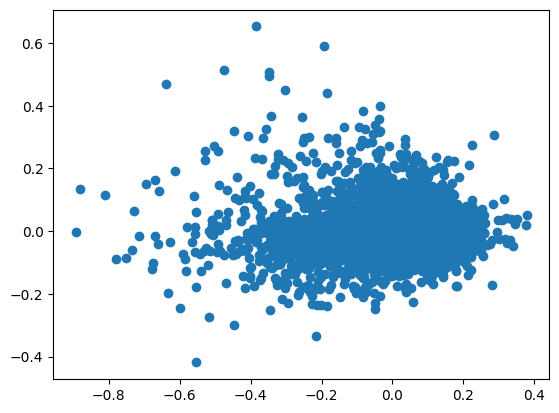

In [92]:
import matplotlib.pyplot as plt

plt.scatter(reduced_df['principal component1'], reduced_df['principal component2'])

In [96]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters = 3, random_state=42)
prediction = kmeans_model.fit_predict(data)
reduced_df['kmeans'] = prediction
reduced_df

,principal component1,principal component2,kmeans
0,0.151370,-0.091949,0
1,-0.228337,0.043307,1
2,-0.107996,-0.065720,2
3,0.157388,-0.076862,0
4,0.088338,-0.025867,0
...,...,...,...
4811,0.101334,-0.004050,0
4812,0.097374,0.013096,0
4813,-0.043766,-0.003577,2
4814,0.069642,-0.003429,0


In [97]:
pca.explained_variance_ratio_

array([0.5809009, 0.1419471], dtype=float32)

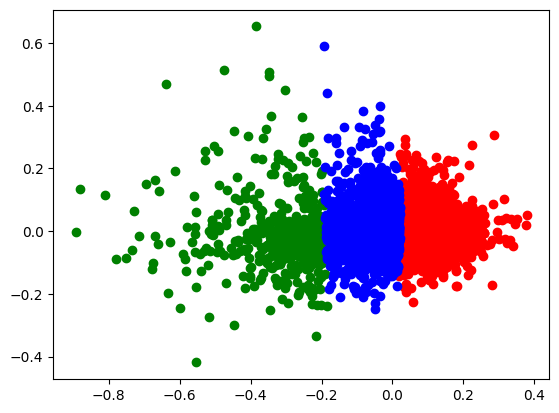

In [99]:
color = ['red','green','blue']
for i in range(3):
  temp = reduced_df[reduced_df['kmeans'] == i]
  plt.scatter(temp['principal component1'],temp['principal component2'],color = color[i])

In [101]:
df['kmeans'] = reduced_df['kmeans']
df

,Date,Name,Score,Review,like,token,vector,kmeans
0,"January 26, 2020",Bernard Reis,1,completely frustrating experience paid extra ...,7,"[complet, frustrat, experi, paid, extra, money...","[-0.027043438, -0.009714136, -0.022662852, -0....",0
1,"January 18, 2020",Gordon Inman,2,some good features but this app isn t very sm...,8,"[good, featur, app, smart, would, think, conne...","[0.0017254866, 0.020771014, -0.0063251746, -0....",1
2,"January 18, 2020",MrDurma,4,this app works perfectly it allowed us to dow...,2,"[app, work, perfectli, allow, us, download, ma...","[0.013212714, 0.054696433, 0.010115224, -0.040...",2
3,"January 26, 2020",K Kostas,3,good but not great for an app by lg not the m...,1,"[good, great, app, lg, user, interfac, friendl...","[0.02744596, 0.04095411, 0.0027181706, -0.0114...",0
4,"January 17, 2020",Greg Evans,3,app is useful but limited and requires some up...,1,"[app, use, limit, requir, updat, wifi, setup, ...","[-0.00071370136, 0.017110731, -0.012510121, -0...",0
...,...,...,...,...,...,...,...,...
4811,"May 11, 2018",A Google user,5,it is very good and useful app in my lifr,0,"[good, use, app, lifr]","[-0.008056509, 0.0006220054, -0.007879141, -0....",0
4812,"October 2, 2017",repou Ltd,1,can t even open the app crashes,0,"[even, open, app, crash]","[-0.012135188, 0.008835578, 0.008979726, 0.002...",0
4813,"July 22, 2018",jayanth murli,5,it is well helpfull for my reference this appl...,0,"[well, helpful, refer, applic, good, applic]","[-0.010409882, 0.013502791, -0.008197666, -0.0...",2
4814,"May 29, 2018",Mukul,1,it s not installing showing a error,0,"[instal, show, error]","[-0.0001559913, 0.0008630182, 0.002604829, -0....",0


In [106]:

from collections import Counter
from wordcloud import WordCloud
words =[]
for i in df['token']:
    for w in i:
        words.append(w)
words
text = nltk.Text(words, name = 'app')

count = Counter(text)
count = dict(count)
bindo = pd.DataFrame({"word": list(count.keys()),
        "count": list(count.values())})
bindo = bindo.sort_values(by=['count'],ascending=False).reset_index(drop=True)
bindo

,word,count
0,app,3961
1,work,1595
2,lg,1450
3,use,1279
4,connect,1088
...,...,...
4872,banyak,1
4873,ft,1
4874,eleph,1
4875,op,1


In [107]:
zero = df[df["kmeans"] == 0]
z = []
for i in zero["token"]:
    for w in i:
        z.append(w)

z = dict(Counter(z))

one = df[df["kmeans"] == 1]
o = []
for i in one["token"]:
    for w in i:
        o.append(w)

o = dict(Counter(o))

two = df[df["kmeans"] == 2]
t = []
for i in two["token"]:
    for w in i:
        t.append(w)

t = dict(Counter(t))

In [115]:
zero = {}

for i in z:
  zero[i] = z[i]/count[i]

zero = pd.DataFrame({'token':list(z.keys()),"count":list(z.values()),"ratio":list(zero.values())})
print('zero')
print(zero)


one = {}

for i in o:
  one[i] = o[i]/count[i]

one = pd.DataFrame({'token':list(o.keys()),"count":list(o.values()),"ratio":list(one.values())})
print('one')
print(one)



two = {}

for i in t:
  two[i] =t[i]/count[i]

two = pd.DataFrame({'token':list(t.keys()),"count":list(t.values()),"ratio":list(two.values())})
print('two')
print(two)


zero
          token  count     ratio
0       complet     61  0.448529
1      frustrat     22  0.372881
2        experi     17  0.346939
3          paid      8  0.235294
4         extra     14  0.285714
...         ...    ...       ...
2448      teach      1  1.000000
2449  teknalegi      1  1.000000
2450        inc      1  0.500000
2451       oreo      1  0.142857
2452       lifr      1  1.000000

[2453 rows x 3 columns]
one
          token  count     ratio
0          good     27  0.083591
1        featur     65  0.227273
2           app    751  0.189599
3         smart     79  0.189904
4         would     93  0.230198
...         ...    ...       ...
2773    bentley      1  1.000000
2774  continent      1  1.000000
2775        mod      1  0.500000
2776       beta      1  0.333333
2777         ft      1  1.000000

[2778 rows x 3 columns]
two
          token  count     ratio
0           app   1403  0.354203
1          work    505  0.316614
2     perfectli     12  0.272727
3         all

In [120]:
zero.sort_values(by = ["count"], ascending = False).iloc[:100].sort_values(by = ["ratio"], ascending = False).reset_index(drop = True)
one.sort_values(by = ["count"], ascending = False).iloc[:100].sort_values(by = ["ratio"], ascending = False).reset_index(drop = True)
two.sort_values(by = ["count"], ascending = False).iloc[:100].sort_values(by = ["ratio"], ascending = False).reset_index(drop = True)

,token,count,ratio
0,data,75,0.493421
1,uninstal,84,0.488372
2,log,63,0.470149
3,chang,101,0.457014
4,could,109,0.448560
...,...,...,...
95,fix,80,0.301887
96,much,67,0.301802
97,root,93,0.290625
98,great,88,0.275862
